In [1]:
import h5py
import numpy as np
import glob, os, re, sys
sys.path.append('../')

import astro_helper as ah

import itertools
from scipy.stats import binned_statistic_2d

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import gridspec
from matplotlib import cm
from matplotlib import rc
rc('font',**{'family':'DejaVu Sans','sans-serif':['Helvetica']})

In [2]:
# Plotting properties
grey = '#3C3C3C'
from matplotlib import rc
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.weight'] = 'normal'
mpl.rcParams['xtick.major.pad'] = 5
mpl.rcParams['ytick.major.pad'] = 5
mpl.rcParams['axes.labelpad'] = 10
mpl.rcParams['font.size'] = 20
mpl.rcParams['legend.fontsize'] = 20
mpl.rcParams['legend.numpoints'] = 1
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['mathtext.default'] = 'regular'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['xtick.color'] = grey
mpl.rcParams['ytick.color'] = grey
mpl.rcParams['axes.edgecolor'] = grey
mpl.rcParams['axes.labelcolor'] = grey
rc('axes', linewidth=1.5)
rc('axes', edgecolor=grey)
labels_font = {'size':'20'} 

In [23]:
# PDEimgname = '/n/holystore01/LABS/itc_lab/Users/sjeffreson/LtU/LOW-PRFM/output/PDE_proj_060'
# Veldispimgname = '/n/holystore01/LABS/itc_lab/Users/sjeffreson/LtU/LOW-PRFM/output/Veldisp_proj_060'
# tempimgname = '/n/holystore01/LABS/itc_lab/Users/sjeffreson/LtU/LOW-PRFM/output/temp_proj_060'
# Sfrimgname = '/n/holystore01/LABS/itc_lab/Users/sjeffreson/LtU/LOW-PRFM/output/Sfr_proj_060'
# Sigmaimgname = '/n/holystore01/LABS/itc_lab/Users/sjeffreson/LtU/LOW-PRFM/output/density_proj_060'

PDEimgname = '/n/holystore01/LABS/itc_lab/Users/sjeffreson/LOW-ETGs/hiM-PRFM/output/PDE_proj_030'
Veldispimgname = '/n/holystore01/LABS/itc_lab/Users/sjeffreson/LOW-ETGs/hiM-PRFM/output/Veldisp_proj_030'
tempimgname = '/n/holystore01/LABS/itc_lab/Users/sjeffreson/LOW-ETGs/hiM-PRFM/output/temp_proj_030'
Sfrimgname = '/n/holystore01/LABS/itc_lab/Users/sjeffreson/LOW-ETGs/hiM-PRFM/output/Sfr_proj_030'
Sigmaimgname = '/n/holystore01/LABS/itc_lab/Users/sjeffreson/LOW-ETGs/hiM-PRFM/output/density_proj_030'

In [24]:
Msol_to_g = 1.99E33
pc_to_cm = 3.086E18
kpc_to_cm = 3.086E21
Myr_to_s = 3.15576E13
Gyr_to_s = 3.15576E16
avogadro = 6.022E23

width_kpc = 15.
width = width_kpc * kpc_to_cm

In [25]:
def get_image_data(filename):
    with open(filename, "rb") as f:
        xpix = np.fromfile(f, dtype=np.int32, count=1)[0]
        ypix = np.fromfile(f, dtype=np.int32, count=1)[0]
        img = np.fromfile(f, dtype=np.float32, count=xpix*ypix)
    img = np.reshape(img, (xpix, ypix))
    img = np.rot90(img)
    return img

In [26]:
Sigmaimg = get_image_data(Sigmaimgname)
PDEimg = get_image_data(PDEimgname)
Veldispimg = get_image_data(Veldispimgname)
Uimg = ah.kB_cgs * get_image_data(tempimgname) / (5./3. - 1.)
Sfrimg = get_image_data(Sfrimgname)
print(np.shape(PDEimg))

(50, 50)


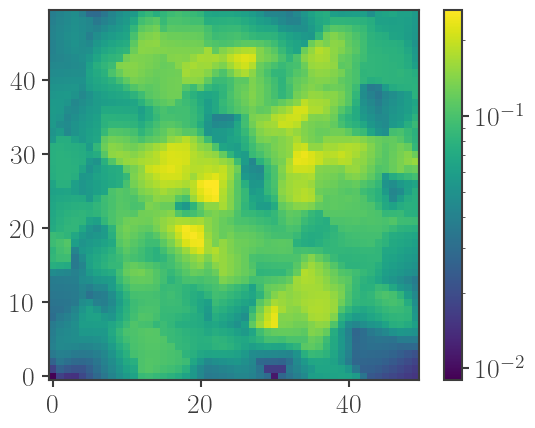

4906.662933184691


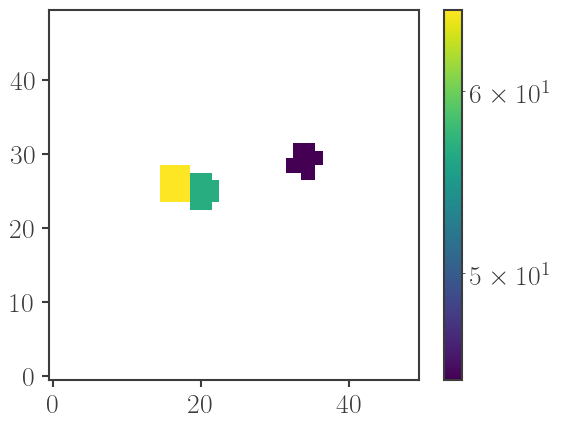

/tmp/ipykernel_3123677/1387076851.py:12: RuntimeWarning: divide by zero encountered in divide
  plt.imshow((Sigmaimg * (0.08)**2)/Sfrimg, cmap='viridis', origin='lower', norm=LogNorm())


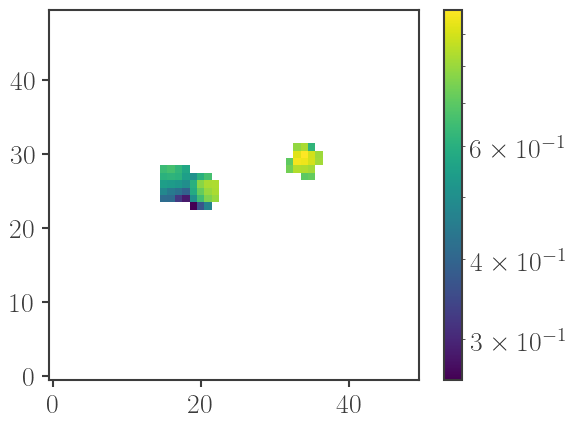

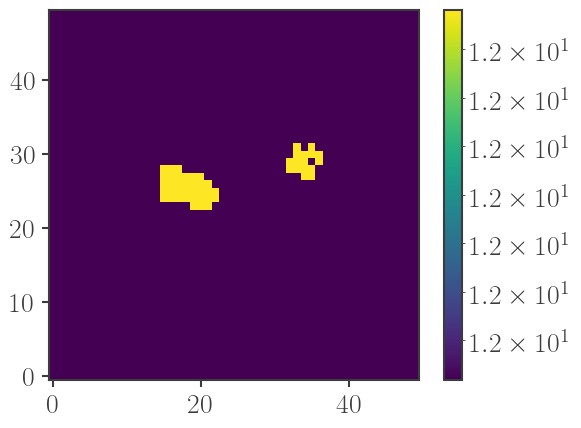

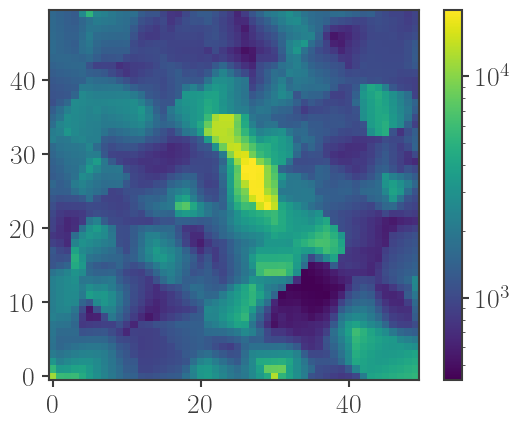

In [27]:
plt.imshow(Sigmaimg*1.e9/(1.e3)**2, cmap='viridis', origin='lower', norm=LogNorm())
plt.colorbar()
plt.show()

press_unit = 1.e9*1.99e33*(1.e5)**2/(3.086e21)**3 / 1.38e-16
print(press_unit)
plt.imshow(PDEimg*press_unit, cmap='viridis',
           origin='lower', norm=LogNorm()) # [M]*[V]^2/[L]^3
plt.colorbar()
plt.show()

plt.imshow((Sigmaimg * (0.08)**2)/Sfrimg, cmap='viridis', origin='lower', norm=LogNorm())
plt.colorbar()
plt.show()

plt.imshow(Veldispimg, cmap='viridis', origin='lower', norm=LogNorm())
plt.colorbar()
plt.show()

plt.imshow(Uimg/ah.kB_cgs, cmap='viridis', origin='lower', norm=LogNorm())
plt.colorbar()
plt.show()

/tmp/ipykernel_3980385/503273738.py:1: RuntimeWarning: divide by zero encountered in divide
  tau_deps = np.ravel((Sigmaimg * (0.08)**2)/Sfrimg)
/tmp/ipykernel_3980385/503273738.py:6: RuntimeWarning: invalid value encountered in divide
  tau_dyns = np.ravel((Sigmaimg*Sigma_unit * Veldispimg*Veldisp_unit / (PDEimg*press_unit)) / ah.Gyr_to_s)


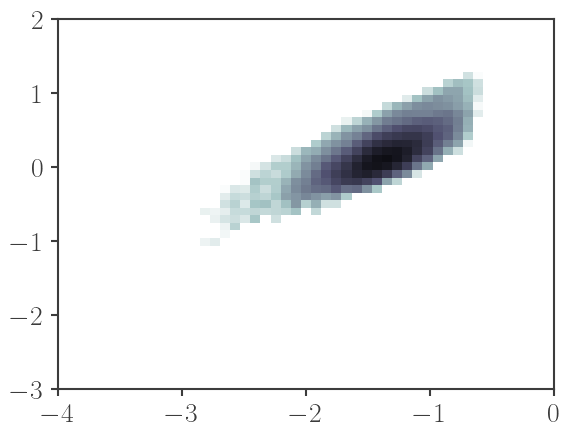

In [8]:
tau_deps = np.ravel((Sigmaimg * (0.08)**2)/Sfrimg)

press_unit = 1.e9*1.99e33*(1.e5)**2/(3.086e21)**3
Sigma_unit = 1.e9*1.99e33/(3.086e21)**2
Veldisp_unit = 1.e5
tau_dyns = np.ravel((Sigmaimg*Sigma_unit * Veldispimg*Veldisp_unit / (PDEimg*press_unit)) / ah.Gyr_to_s)

SFR = np.ravel(Sfrimg)

frac_SFR, _, _, _ = binned_statistic_2d(
    np.log10(tau_dyns), np.log10(tau_deps),
    SFR, statistic='sum',
    bins=(np.linspace(-4., 0., 50), np.linspace(-3., 2., 50))
)
frac_SFR /= np.sum(frac_SFR)
plt.imshow(frac_SFR.T, origin='lower',
                 extent=(-4., 0., -3., 2.), aspect='auto',
                 cmap=plt.cm.bone_r, norm=LogNorm(vmin=1.e-5, vmax=1.e-1))
plt.show()